# CLT with dice

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [2]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) 
    #turn it into integers from 1 to 6:
    return [int(x*6)+1 for x in flatRandom]

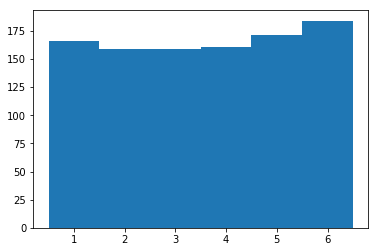

In [3]:
oneDieRandom = throwOneDie(1000)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [4]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [5]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.564 , sigma =  1.7337543078533357


Now let's throw multiple dice

In [6]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        newRandomNumbers = PDF(Nevents)
        randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

Now let's put it all together in one neat function

In [7]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999):
    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)

    mini=histoMin
    maxi=histoMax
    if(histoMax < histoMin):
        mini=NDice-0.5
        maxi=NDice*6+0.5
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi-mini)
    if histoBins > 0 : bins=histoBins

    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram
    plt.show()
    mu, var, sigma = meanAndStdev(RandomDice)
    print("For ", NDice, " dice, thrown ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)

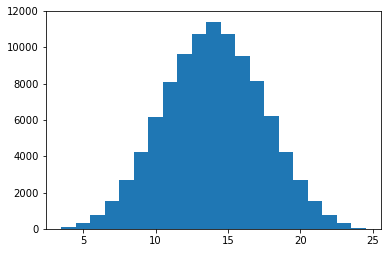

For  4  dice, thrown  100000  times:
mean =  14.00093 , variance =  11.645969135099989 , sigma =  3.412619101965525


In [8]:
doAll(throwOneDie, 4, 100000)

Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected.

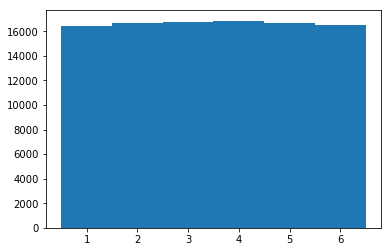

For  1  dice, thrown  100000  times:
mean =  3.50228 , variance =  2.8977548016000014 , sigma =  1.7022792960028625


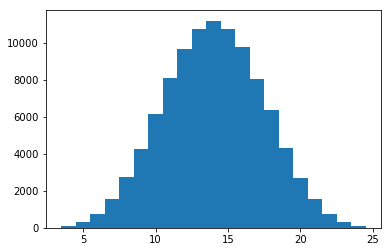

For  4  dice, thrown  100000  times:
mean =  14.00858 , variance =  11.644306383599996 , sigma =  3.4123754751785444


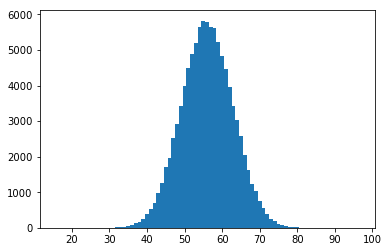

For  16  dice, thrown  100000  times:
mean =  56.02513 , variance =  46.89873848310026 , sigma =  6.848265363075548


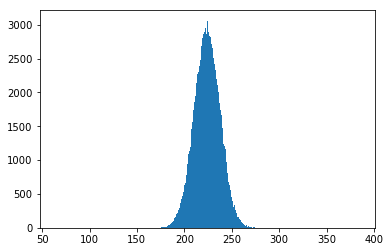

For  64  dice, thrown  100000  times:
mean =  223.94212 , variance =  186.09596990560385 , sigma =  13.641699670701003


In [9]:
doAll(throwOneDie, 1, 100000)
doAll(throwOneDie, 4, 100000)
doAll(throwOneDie, 16, 100000)
doAll(throwOneDie, 64, 100000)

Does it also work with other distributions? Let's try a triangular shaped one

In [10]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften) 
    triangleRandom = [sqrt(x) for x in flat] ## magic coordinate trafo
    #turn it into integers from 1 to 6: (not really needed, but why not)
    return [int(x*6)+1 for x in triangleRandom]

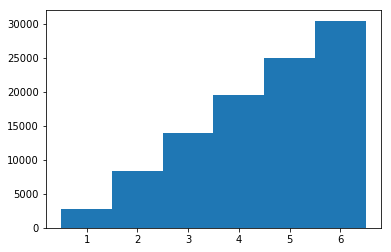

For  1  dice, thrown  100000  times:
mean =  4.47053 , variance =  1.966271519100001 , sigma =  1.4022380393856106


In [11]:
doAll(throwTriangle, 1, 100000)

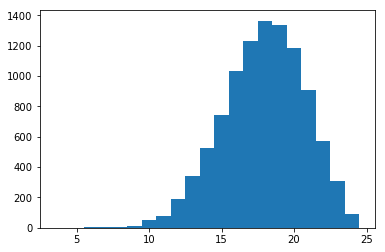

For  4  dice, thrown  10000  times:
mean =  17.9112 , variance =  8.000714559999949 , sigma =  2.828553439481027


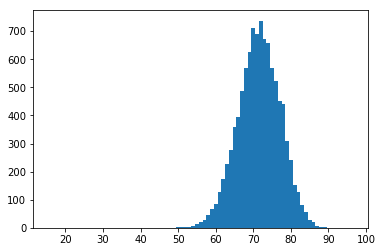

For  16  dice, thrown  10000  times:
mean =  71.4974 , variance =  31.316393240000252 , sigma =  5.596105184858506


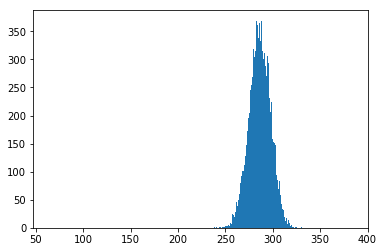

For  64  dice, thrown  10000  times:
mean =  286.3075 , variance =  129.5169437500008 , sigma =  11.38055111802591


In [12]:
doAll(throwTriangle, 4, 10000)
doAll(throwTriangle, 16, 10000)
doAll(throwTriangle, 64, 10000)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential

In [13]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

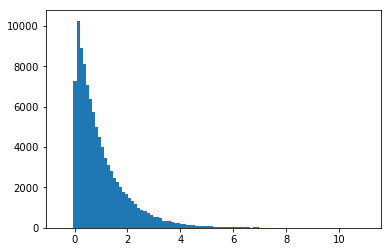

For  1  dice, thrown  100000  times:
mean =  0.999785036284 , variance =  1.00186200625 , sigma =  1.00093057014673


In [14]:
doAll(expo, 1, 100000, 100)

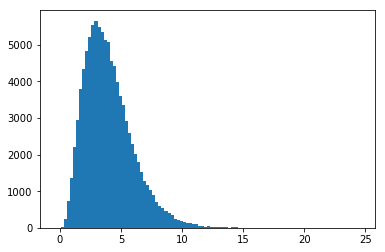

For  4  dice, thrown  100000  times:
mean =  3.99532520152 , variance =  3.96605925015 , sigma =  1.9914967361647382


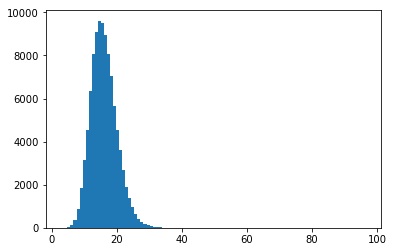

For  16  dice, thrown  100000  times:
mean =  16.0145943987 , variance =  15.8663150725 , sigma =  3.9832543318839955


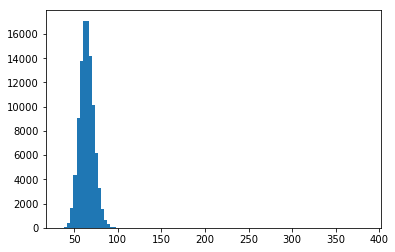

For  64  dice, thrown  100000  times:
mean =  63.9634887419 , variance =  63.801802173 , sigma =  7.987603030510862


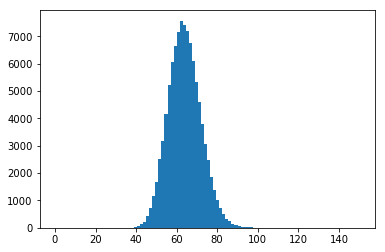

For  64  dice, thrown  100000  times:
mean =  63.9646333387 , variance =  63.8931377784 , sigma =  7.993318320849277


In [15]:
doAll(expo, 4, 100000, 100)
doAll(expo, 16, 100000, 100)
doAll(expo, 64, 100000, 100)
doAll(expo, 64, 100000, 100, 0, 150) # zoom in a bit